In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# a simple function to compute a dictionary with locations of nodes, as given by vectors x and y
def embed_nodes(g, x, y):
    return dict((g.nodes()[i], (x[i],y[i])) for i in range(len(g.nodes())))

In [3]:
#Create a grid graph
gr = nx.grid_2d_graph(10, 10)

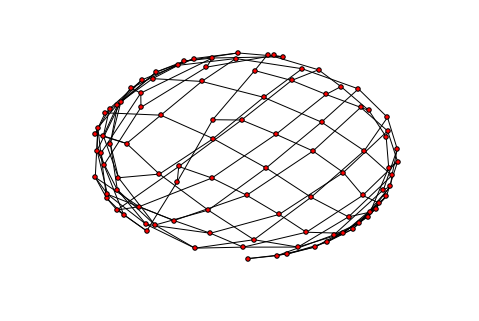

In [4]:
#Let's try to draw it:
nx.draw(gr, node_size=20)

In [5]:
lapgr = nx.laplacian_matrix(gr)

In [6]:
#compute eigens:
(w,v) = lin.eigh(lapgr.todense())

In [7]:
# compute embedding (positions) using the eigen vectors corresponding to eigen values 1 and 2 
# (not eig zero)
emb = embed_nodes(gr,v[:,1].ravel().tolist()[0],v[:,2].ravel().tolist()[0])

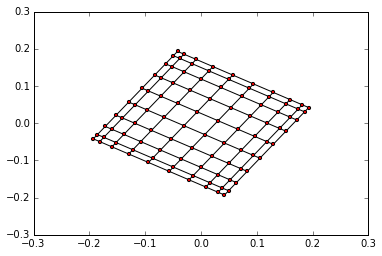

In [8]:
#plt.figure(figsize=(8,8))
nx.draw_networkx(gr, pos=emb, node_size=10, with_labels=False)

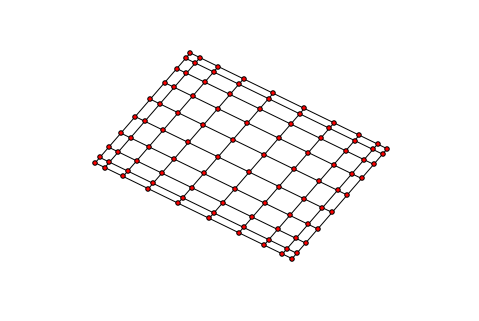

In [9]:
nx.draw_spectral(gr, node_size=20)

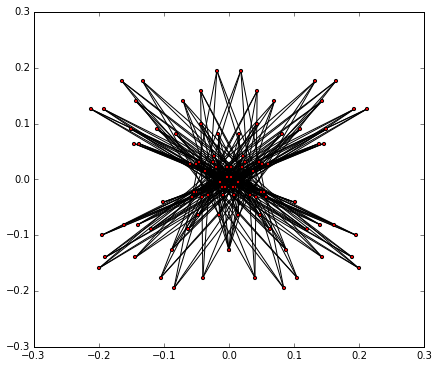

In [10]:
#draw with the highest eigen values
plt.figure(figsize=(7,6))
emb = embed_nodes(gr,v[:,98].ravel().tolist()[0],v[:,99].ravel().tolist()[0])
nx.draw_networkx(gr, pos=emb, node_size=10, with_labels=False)

In [11]:
#make a 1-d grid
grid1d = nx.grid_2d_graph(20,1)
#nx.draw(grid1d, with_labels=True)

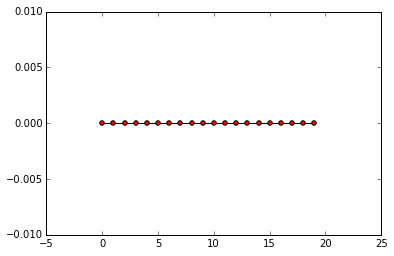

In [12]:
#manually draw them on a line
emb = dict((grid1d.nodes()[i], (grid1d.nodes()[i][0],grid1d.nodes()[i][1])) for i in range(len(grid1d.nodes())))
nx.draw_networkx(grid1d, pos=emb, node_size=20, with_labels=False)

In [13]:
#compute laplacian and eigen vectors
lap1gr = nx.laplacian_matrix(grid1d)
(w,v) = lin.eigh(lap1gr.todense())

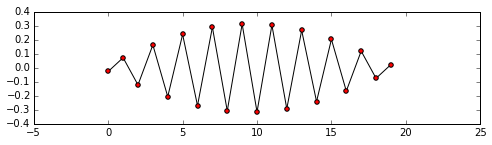

In [20]:
# draw the jth eigen vector
plt.figure(figsize=(8,2))
j=19
emb = dict((grid1d.nodes()[i], (grid1d.nodes()[i][0], v[:,j].ravel().tolist()[0][i])) for i in range(len(grid1d.nodes())))
nx.draw_networkx(grid1d, pos=emb, node_size=20, with_labels=False)

In [ ]:
#let's try to plot all of them:
plt.figure(figsize=(10,7))
           
for j in range(20):
    emb = dict((grid1d.nodes()[i], (grid1d.nodes()[i][0], j+v[:,j].ravel().tolist()[0][i])) for i in range(len(grid1d.nodes())))
    nx.draw_networkx(grid1d, pos=emb, node_size=1, with_labels=False)

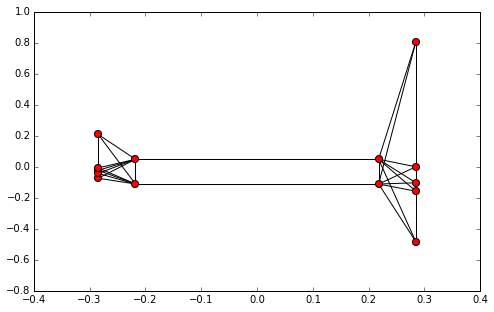

In [21]:
#community detection:
bg = nx.barbell_graph(7,0)
bg.add_edge(9,1)
lpbg = nx.laplacian_matrix(bg)
(w,v) = lin.eigh(lpbg.todense())
emb = embed_nodes(bg,v[:,1].ravel().tolist()[0],v[:,2].ravel().tolist()[0])
plt.figure(figsize=(8,5))
nx.draw_networkx(bg, pos=emb, node_size=50, with_labels=False)

In [ ]:
#let's add one more community:

c = nx.complete_graph(7)
h = nx.disjoint_union(bg,c)
h.add_edge(20,10)
h.add_edge(17,2)
lph = nx.laplacian_matrix(h)
(w,v) = lin.eigh(lph.todense())
emb = embed_nodes(h,v[:,1].ravel().tolist()[0],v[:,2].ravel().tolist()[0])
nx.draw_networkx(h, pos=emb, node_size=40, with_labels=False)